# GMM vs TMM

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ['JAX_ENABLE_X64'] = '1'

cache_path = "../../cache/"

In [2]:
import numpy as np
import pandas as pd
import pickle
import sklearn
import tqdm
from matplotlib.patches import Patch
import corc.utils
import corc.our_datasets
import matplotlib.pyplot as plt

In [3]:
dataset_names = corc.our_datasets.COMPLEX_DATASETS

In [22]:
n_components=35

all_aris_tmm = dict()
for dataset_name in (dataset_names):
    print(dataset_name)

    file_path_tmm = cache_path + f"stability/seeds_{dataset_name}_{n_components}.pkl"
    if not os.path.exists(file_path_tmm):
        continue
    with open(file_path_tmm, 'rb') as file:
        models_tmm = pickle.load(file)

    X, y, tsne = corc.utils.load_dataset(dataset_name,cache_path=cache_path)
    n_classes = len(np.unique(y))

    ari_scores = list()
    for model in models_tmm:
        predictions = model.predict_with_target(X, target_number_classes = n_classes)
        ari_scores.append(sklearn.metrics.adjusted_rand_score(predictions, y))
    all_aris_tmm[dataset_name] = ari_scores

df_tmm_manual = pd.DataFrame(all_aris_tmm)


blobs1_8
blobs1_16
blobs1_32
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
blobs1_64
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 1 clusters instead.
blobs2_8
blobs2_16
blobs2_32
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 2 clust

In [4]:
if os.path.exists(cache_path + f"stability/all_aris_of_seeds.pkl"):
    with open(cache_path + f"stability/all_aris_of_seeds.pkl", 'rb') as file:
        all_dataframes = pickle.load(file)

In [4]:
all_dataframes = dict()
for n_components in [15,25,35]:
    all_aris_tmm = dict()
    all_aris_gmm = dict()
    for dataset_name in tqdm.tqdm(dataset_names):

        file_path_tmm = cache_path + f"stability/seeds_{dataset_name}_{n_components}.pkl"
        file_path_gmm = cache_path + f"stability/seeds_{dataset_name}_gmm_{n_components}.pkl"
        if not os.path.exists(file_path_tmm) or not os.path.exists(file_path_gmm):
            print(f"skipping {dataset_name}")
            continue
        # print(dataset_name)
        with open(file_path_tmm, 'rb') as file:
            models_tmm = pickle.load(file)

        with open(file_path_gmm, 'rb') as file:
            models_gmm = pickle.load(file)

        X, y, tsne = corc.utils.load_dataset(dataset_name,cache_path=cache_path)
        n_classes = len(np.unique(y))

        ari_scores = list()
        for model in models_tmm:
            predictions = model.predict_with_target(X, target_number_classes = n_classes)
            ari_scores.append(sklearn.metrics.adjusted_rand_score(predictions, y))
        all_aris_tmm[dataset_name] = ari_scores

        ari_scores = list()
        for model in models_gmm:
            predictions = model.predict_with_target(X, target_number_classes = n_classes)
            ari_scores.append(sklearn.metrics.adjusted_rand_score(predictions, y))
        all_aris_gmm[dataset_name] = ari_scores
    df_tmm = pd.DataFrame(all_aris_tmm)
    df_gmm = pd.DataFrame(all_aris_gmm)

    df_stats_tmm = df_tmm.agg(['mean', 'std'])
    df_stats_tmm = df_stats_tmm.rename(index={'mean': 'Mean TMM', 'std': 'Std TMM'})
    df_stats_gmm = df_gmm.agg(['mean', 'std'])
    df_stats_gmm = df_stats_gmm.rename(index={'mean': 'Mean GMM', 'std': 'Std GMM'})
    df_both = pd.concat([df_stats_tmm, df_stats_gmm], axis=0)
    all_dataframes[n_components] = df_both

    with open(cache_path + f"stability/all_aris_of_seeds.pkl", 'wb') as file:
        pickle.dump(all_dataframes, file)

 15%|█▌        | 3/20 [00:10<01:01,  3.61s/it]

6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.


 35%|███▌      | 7/20 [00:24<00:45,  3.46s/it]

6 clusters is not achievable.
Working with 5 clusters instead.


 70%|███████   | 14/20 [00:41<00:15,  2.60s/it]

6 clusters is not achievable.
Working with 5 clusters instead.


 75%|███████▌  | 15/20 [00:44<00:13,  2.77s/it]

6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.


 80%|████████  | 16/20 [00:46<00:10,  2.55s/it]

6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.


 15%|█▌        | 3/20 [00:13<01:15,  4.42s/it]

6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.


 20%|██        | 4/20 [00:14<00:54,  3.38s/it]

6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.


 35%|███▌      | 7/20 [00:31<01:05,  5.07s/it]

6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 1 clusters instead.


 40%|████      | 8/20 [00:33<00:50,  4.21s/it]

6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.


 75%|███████▌  | 15/20 [00:55<00:15,  3.03s/it]

6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.


 80%|████████  | 16/20 [00:57<00:11,  2.79s/it]

6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 5 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.


 10%|█         | 2/20 [00:13<02:07,  7.10s/it]

6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.
6 clusters is not achievable.
Working with 3 clusters instead.


 15%|█▌        | 3/20 [00:16<01:27,  5.14s/it]

skipping blobs1_64


 30%|███       | 6/20 [00:35<01:28,  6.34s/it]

6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 4 clusters instead.
6 clusters is not achievable.
Working with 2 clusters instead.


 35%|███▌      | 7/20 [00:36<01:05,  5.00s/it]

skipping blobs2_64


 75%|███████▌  | 15/20 [01:12<00:23,  4.79s/it]

6 clusters is not achievable.
Working with 5 clusters instead.


100%|██████████| 20/20 [01:23<00:00,  4.16s/it]


In [5]:
df_gmm = pd.DataFrame(all_aris_gmm)


NameError: name 'all_aris_gmm' is not defined

In [23]:
df_tmm_manual.agg(['mean', 'std'])


,blobs1_8,blobs1_16,blobs1_32,blobs1_64,blobs2_8,blobs2_16,blobs2_32,blobs2_64,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
mean,0.254399,0.291197,0.099561,0.118822,0.725640,0.486727,0.078977,0.122357,0.943490,0.991722,0.853693,0.976347,0.874788,0.790831,0.885017,0.809538,0.664255,0.763149,0.752843,0.580064
std,0.086741,0.104645,0.100272,0.158560,0.063614,0.230811,0.138827,0.184839,0.041884,0.018096,0.077501,0.026050,0.031051,0.058604,0.037707,0.047143,0.000640,0.096397,0.048607,0.038053


In [ ]:
df_tmm_manual.agg(['mean', 'std'])


,blobs1_8,blobs1_16,blobs1_32,blobs1_64,blobs2_8,blobs2_16,blobs2_32,blobs2_64,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
mean,0.282259,0.284714,0.054974,0.116333,0.616263,0.497623,0.070284,0.129668,0.943490,0.991722,0.853693,0.983721,0.874788,0.790831,0.866942,0.813729,0.664255,0.763149,0.752843,0.580064
std,0.079028,0.095005,0.057556,0.153521,0.126164,0.225051,0.117990,0.198835,0.041884,0.018096,0.077501,0.018770,0.031051,0.058604,0.026153,0.047629,0.000640,0.096397,0.048607,0.038053


In [18]:
all_dataframes[35]

,blobs1_8,blobs1_16,blobs1_32,blobs2_8,blobs2_16,blobs2_32,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Mean TMM,0.254399,0.315383,0.099561,0.616263,0.472701,0.078133,0.943490,0.991722,0.853693,0.976347,0.874788,0.790831,0.885017,0.809538,0.664255,0.763149,0.752843,0.580064
Std TMM,0.086741,0.085962,0.100272,0.126164,0.220613,0.138896,0.041884,0.018096,0.077501,0.026050,0.031051,0.058604,0.037707,0.047143,0.000640,0.096397,0.048607,0.038053
Mean GMM,0.243779,0.485655,0.273292,0.768583,0.605311,0.294786,0.998940,0.999443,0.982230,0.983552,0.700672,0.653724,0.633538,0.354908,0.629386,0.520579,0.273971,0.086512
Std GMM,0.106693,0.216788,0.065886,0.151919,0.147023,0.194710,0.001112,0.000388,0.030136,0.032509,0.087873,0.122072,0.068203,0.068445,0.048804,0.083255,0.085203,0.062800


In [9]:
def plot_combined_data(df_both):
    means = df_both.loc[['Mean TMM', 'Mean GMM']]
    stds = df_both.loc[['Std TMM', 'Std GMM']]
    
    columns_to_plot = [col for col in means.columns if not col.startswith('blob')]
    means = means[columns_to_plot]
    stds = stds[columns_to_plot]

    x = np.arange(len(means.columns))
    width = 0.35

    plt.bar(x - width/2, means.loc['Mean TMM'], width, yerr=stds.loc['Std TMM'], label='TMM')
    plt.bar(x + width/2, means.loc['Mean GMM'], width, yerr=stds.loc['Std GMM'], label='GMM')

    # plt.xticks(x, means.columns)
    plt.xticks(x, means.columns, rotation=90)
    plt.legend()
    plt.show()


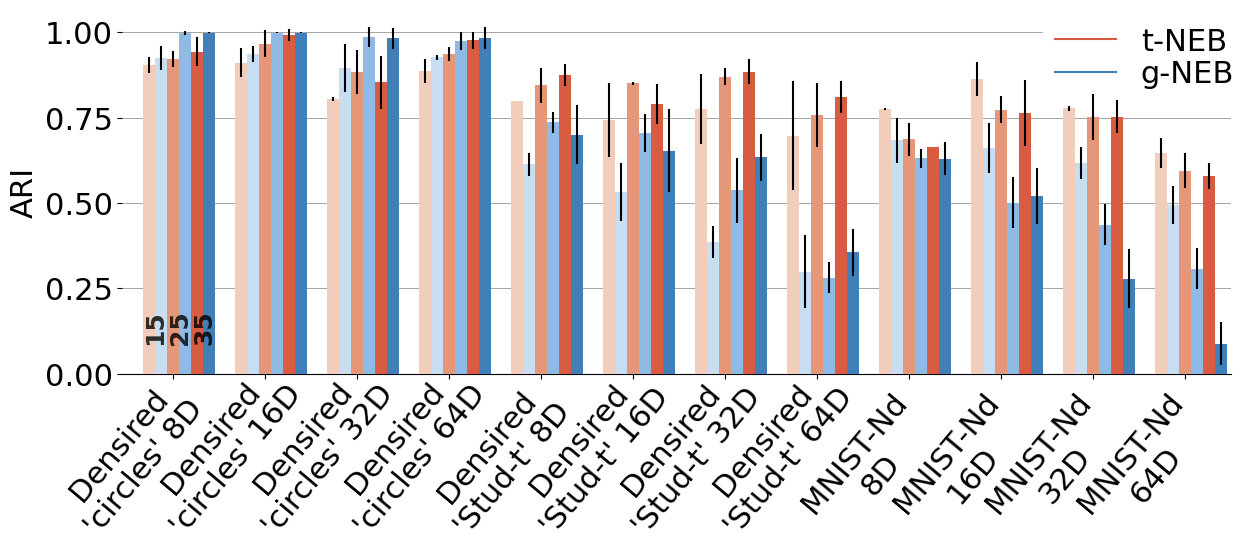

In [47]:
def plot_combined_data2(df_both1, df_both2, df_both3):
    means1 = df_both1.loc[['Mean TMM', 'Mean GMM']]
    stds1 = df_both1.loc[['Std TMM', 'Std GMM']]
    means2 = df_both2.loc[['Mean TMM', 'Mean GMM']]
    stds2 = df_both2.loc[['Std TMM', 'Std GMM']]
    means3 = df_both3.loc[['Mean TMM', 'Mean GMM']]
    stds3 = df_both3.loc[['Std TMM', 'Std GMM']]

    columns_to_plot = set(means1.columns) & set(means2.columns) & set(means3.columns)
    columns_to_plot = [col for col in means1.columns if not col.startswith('blob')]
    means1 = means1[columns_to_plot]
    stds1 = stds1[columns_to_plot]
    means2 = means2.reindex(columns=columns_to_plot, fill_value=0)
    stds2 = stds2.reindex(columns=columns_to_plot, fill_value=0)

    means3 = means3.reindex(columns=columns_to_plot, fill_value=0)
    stds3 = stds3.reindex(columns=columns_to_plot, fill_value=0)

    x = np.arange(len(means1.columns))
    width = 0.13

    plt.rcParams['font.size'] = 22
    plt.rcParams['text.usetex'] = False    
    plt.figure(figsize=(13, 6.6))
    plt.xlim(-0.55, len(means1.columns)-.5)


    for i, col in enumerate(means1.columns):
        plt.bar(x[i] - 0.26, means1.loc['Mean TMM', col], width, yerr=stds1.loc['Std TMM', col], color='#f3cdbb', zorder=5)
        plt.bar(x[i] - 0.13, means1.loc['Mean GMM', col], width, yerr=stds1.loc['Std GMM', col], color='#c7ddf2', zorder=5)
        plt.bar(x[i], means2.loc['Mean TMM', col], width, yerr=stds2.loc['Std TMM', col], color='#e69679', zorder=5)
        plt.bar(x[i] + 0.13, means2.loc['Mean GMM', col], width, yerr=stds2.loc['Std GMM', col], color='#8ebae5', zorder=5)
        plt.bar(x[i] + 0.26, means3.loc['Mean TMM', col], width, yerr=stds3.loc['Std TMM', col], color='#d85c41', zorder=5)
        plt.bar(x[i] + 0.39, means3.loc['Mean GMM', col], width, yerr=stds3.loc['Std GMM', col], color='#407fb7', zorder=5)
    
    plt.text(x[0]-0.32,0.1, "15", fontsize=18, color='black',rotation=90, alpha=.8, weight='bold', zorder=6)
    plt.text(x[0]-0.05,0.1, "25", fontsize=18, color='black',rotation=90, alpha=.8, weight='bold', zorder=6)
    plt.text(x[0]+0.21,0.1, "35", fontsize=18, color='black',rotation=90, alpha=.8, weight='bold', zorder=6)
    plt.plot([], [], color='#d85c41', label='t-NEB')
    plt.plot([], [], color='#407fb7', label='g-NEB')

    column_names = [corc.our_datasets.dataset_displaynames[col] for col in means1.columns] #corc.our_datasets.dataset_displaynames[means1.columns]
    # plt.xticks(x+0.2, column_names, rotation=40, ha='right')

    plt.xticks(x, [''] * len(column_names))  # Remove default tick labels
    for i, label in enumerate(column_names):
        plt.text(x[i]-.45, -0.47, label, rotation=50, ha='center')

    plt.ylabel('ARI')
    plt.legend(frameon=True, facecolor='white', edgecolor='white', framealpha=1, loc=(0.83,0.75), labelspacing=0.1, borderaxespad=-0,)
    plt.grid(axis='y', linestyle='-', color='grey', linewidth=0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig(f"../../figures/tmm_vs_gmm.pdf", bbox_inches='tight', pad_inches=0)
    plt.show()

plot_combined_data2(all_dataframes[15], all_dataframes[25], all_dataframes[35])

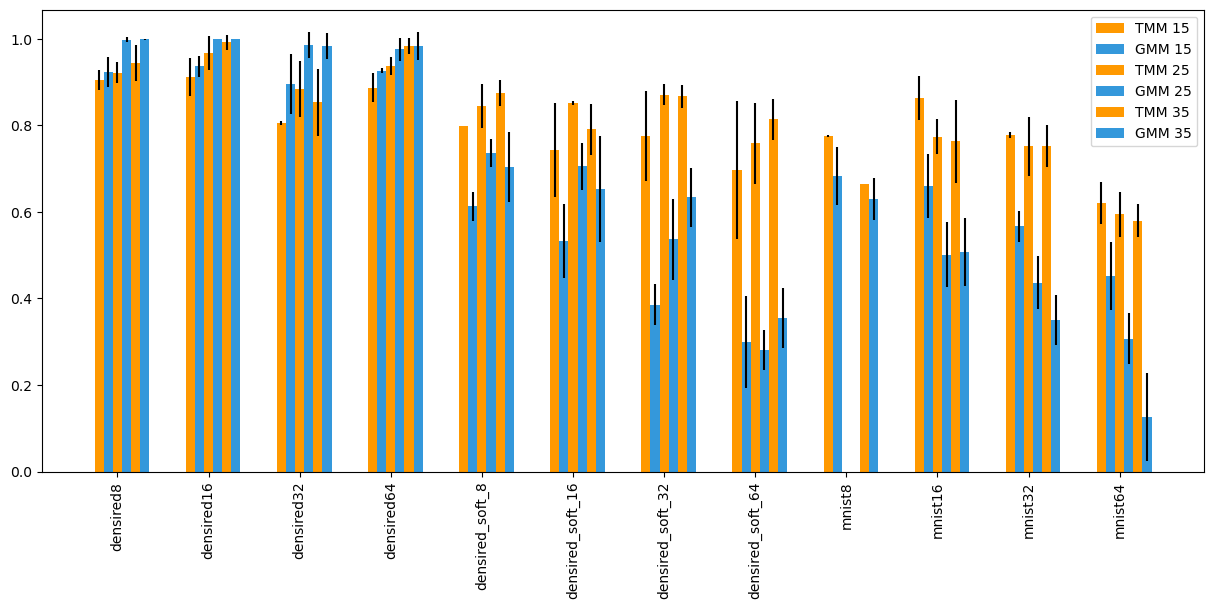

In [74]:
plot_combined_data2(all_dataframes[15], all_dataframes[25], all_dataframes[35])